In [ ]:
#Desrciption : This is a sentiment analysis program that parses the tweets gathered from Twitter using Python.

In [ ]:
#@title Libraries
variable_name = "" #@param {type:"string"}
# Import the libraries

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAMhFIwEAAAAAvo61JCfJvsMVmcLbPZhYNixhKCE%3DnqNcYHeCZyBrVzURJ4Phtj7fWwm6m1pza6xlRBazz0PePdEjP6'
consumer_key = 'ftRtBXP5b2yGRoM0uqBJyQpYM'
consumer_secret = 'BMQHdguMMMG1gzf9Y1W3wcxK8NmRC4comKVnE2vcNy9GPLFdWd'
access_token = '1894339945-xKG8By2AgOGemgPptNVQEQU3EXO68OLFpSsDfRd'
access_token_secret = 'c8G6UokNpyWIO2BtTln1OzEm919Jqjty4XZacSzEp4Ao3'

# Create the client
client = tweepy.Client(bearer_token=bearer_token)

# Authenticate with the API v1.1
auth = tweepy.OAuth1UserHandler(consumer_key, consumer_secret, access_token, access_token_secret)
api = tweepy.API(auth)

try:
    response = client.get_me()
    if response.data:
        print("Authentication successful")
    else:
        print("Authentication failed")
except tweepy.TweepyException as e:
    print(f"Error: {e}")

# Function to fetch tweets using Twitter API v2
def fetch_tweets(query, max_results=100):
    try:
        response = client.search_recent_tweets(query=query, max_results=max_results, tweet_fields=['context_annotations', 'created_at'], expansions=['author_id'])
        return response.data if response.data else []
    except tweepy.TweepyException as e:
        print(f"Error: {e}")
        return []

In [ ]:
#@title Print recent tweets

tweets = fetch_tweets("trump")
for tweet in tweets:
    print(tweet)


Error: 403 Forbidden
When authenticating requests to the Twitter API v2 endpoints, you must use keys and tokens from a Twitter developer App that is attached to a Project. You can create a project via the developer portal.


In [ ]:
df = pd.DataFrame( [tweet.text for tweet in posts] , columns = ['Tweets'])

df.head()

,Tweets
0,RT @ElAmerican_: La clave de lo que hoy emerge...
1,RT @realDailyWire: Trump Campaign Files Lawsui...
2,Mitch McConnell will be remembeted as Trump's ...
3,True....we really are to blame. Turn off the m...
4,@msnbc you can't play the victim when you are ...


In [ ]:
#@title Clean text of @, # and retweets
#Clean the text, create a function toclean the tweets

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #this removes the @mentions in the tweet
  text = re.sub(r'#', '', text) #this removes the # symbol
  text = re.sub(r'RT[\s]+', '', text) #removes the retweet
  text = re.sub(r'https?:\/\/\/S+', '', text) #removes the hyperlink

  return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)
df

,Tweets
0,_: La clave de lo que hoy emerge como el nuevo...
1,: Trump Campaign Files Lawsuit Seeking To ‘Ord...
2,Mitch McConnell will be remembeted as Trump's ...
3,True....we really are to blame. Turn off the m...
4,you can't play the victim when you are the mu...
...,...
61,Trump invokes foreign interference provision o...
62,": the longer the rubes think this is true, the..."
63,Uncle meltz. Don’t go down that rabbit hole. ...
64,: Donald Trump is Aligning with Russian Mercen...


In [ ]:
#@title Get subjectivity
#subjectivity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#data frame w/ columns

df

,Tweets,Subjectivity,Polarity,Analysis
0,_: A reminder that Ivanka was on the board of ...,0.000000,0.000000,Neutral
1,"Last month, Assemblyman Michael Cusick of NY-H...",0.066667,0.000000,Neutral
2,": Obama, Bush e Clinton desafiam Trump e se of...",0.000000,0.000000,Neutral
3,The worst numbers in the world.... congratula...,1.000000,-1.000000,Negative
4,": Trump and Barr had a “contentious"" meeting T...",0.500000,0.050000,Positive
...,...,...,...,...
82,: On the day that the U.S. recorded it's highe...,0.482143,-0.035714,Negative
83,Turns out ⁦⁩ is really the Kraken. Remember sh...,0.200000,0.200000,Positive
84,: I've got news for you you TEXAS would not ha...,0.000000,0.000000,Neutral
85,I understand when I'm being lied too. Trump ...,0.425000,0.100000,Positive


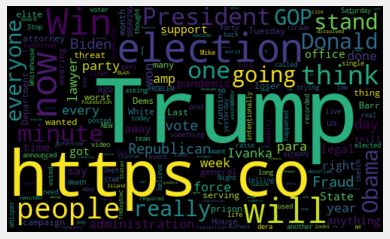

In [ ]:
#@title Most used words
# wordcloud

allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
#@title Get analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,_: A reminder that Ivanka was on the board of ...,0.000000,0.000000,Neutral
1,"Last month, Assemblyman Michael Cusick of NY-H...",0.066667,0.000000,Neutral
2,": Obama, Bush e Clinton desafiam Trump e se of...",0.000000,0.000000,Neutral
3,The worst numbers in the world.... congratula...,1.000000,-1.000000,Negative
4,": Trump and Barr had a “contentious"" meeting T...",0.500000,0.050000,Positive
...,...,...,...,...
82,: On the day that the U.S. recorded it's highe...,0.482143,-0.035714,Negative
83,Turns out ⁦⁩ is really the Kraken. Remember sh...,0.200000,0.200000,Positive
84,: I've got news for you you TEXAS would not ha...,0.000000,0.000000,Neutral
85,I understand when I'm being lied too. Trump ...,0.425000,0.100000,Positive


In [ ]:
#@title Sort tweets
#print all of the positive tweets

j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j+1

1) : Trump and Barr had a “contentious" meeting Tuesday after the attorney general told the AP the Justice Department uncove…

2)   Win a case and you'd have credibility 

Trump campaign’s elite strike force of buffoons are now… https://t.co/jcJDbfcTl1

3)   (Meanwhile Trump: the better liar wins.)

4)  Good morning trumpanzees, sabían que solo faltan 48 días para Enero 20? Tick tock the clock is running and t… https://t.co/9ushRUUqta

5)  Basically, Barr confirmed that Trump is a giant loser and Trump didn’t like it...

6) : Donald Trump posted a forty-six minute long video today that was as ludicrous as a Saturday Night Live sketch and as dera…

7) : fun fact: every Republican now panicking because Trump is destroying their party voted to acquit him

8) : Obama during 4 years of President Trump vs. Obama when anything progressive gets near popular https://t.co/i0wWK2r5sX

9) : Trump legal team’s  ⭐️STAR⭐️ witness https://t.co/ZKWiwUmdk4

10) _Garrett: This Congressman lost his NYC se

In [ ]:
#@title 2nd sort check
#print the negative tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j+1


1)  The worst numbers in the world.... congratulations trump !

2)  I'm really looking forward to seeing the lame duck outside the White House. On January 20, I will… https://t.co/agtNJDHtJX

3) : Trump has done so many corrupt, outrageous, self-serving things, very little should surprise us. But folks, that we are act…

4) : Dems wanted $2.2 trill relief package before election. It was decent but not great. Mnuchin offered $1.1 trill. Dems: No…

5) : It's going to be really awkward when Ivanka Trump walks into the prison cafeteria and everyone is wearing the same outfi…

6) : NEW—Trump’s Sec of State Mike Pompeo just invited over 900 people to the State Dept holiday party. All while State Dept sen…

7) :  He is going to get a blanked pardon by Trump. This is unfortunately how his swamp works. https://t.co/Yy7GF…

8) I hope so. But like you very wary of polls. Nobody seems to like telling pollsters they support Trump. But how the… https://t.co/xhxvlHELDL

9) _Hennessey: Inaugural commi

Text(0, 0.5, 'Subjectivity')

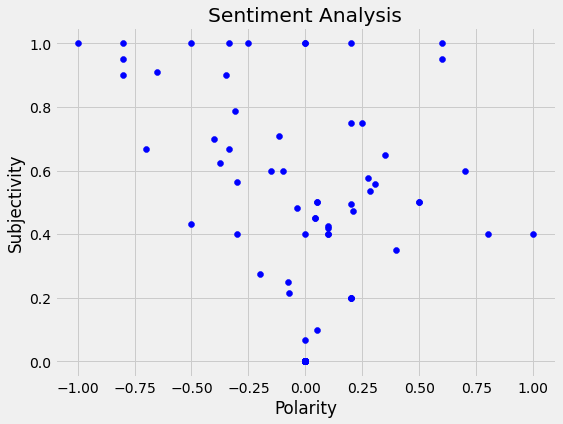

In [ ]:
#@title Plot subjectivity and polarity
#plot the polarity and subjectivity

plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [ ]:
#@title Number of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

33.3

In [ ]:
#@title Number of negative tweets
ptweets = df[df.Analysis == 'Negative']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

27.6

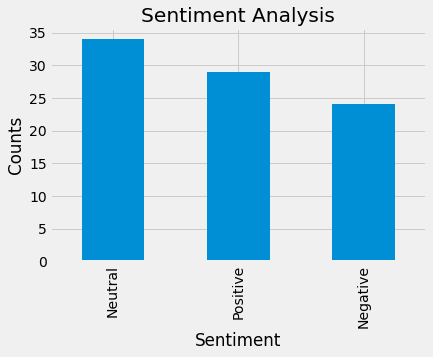

In [ ]:
#@title Plot tweets
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()